In [2]:
import tensorflow as tf
print(tf.__version__)



2025-01-13 14:01:29.475035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


In [3]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [4]:
print(tf.__version__)

2.12.0


Loading the dataset using keras.preprocessing

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training", shuffle=True, image_size=(256, 256), batch_size=32
)



Found 2152 files belonging to 3 classes.


class_names=dataset.class_names

In [7]:
class_names=dataset.class_names


In [8]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

2025-01-13 14:01:39.293159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]
2025-01-13 14:01:39.293778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2152]
	 [[{{node Placeholder/_0}}]]


(32, 256, 256, 3)
[0 1 1 0 1 0 2 1 0 0 1 0 0 2 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1]


2025-01-13 14:03:05.113364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2152]
	 [[{{node Placeholder/_4}}]]
2025-01-13 14:03:05.114144: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2152]
	 [[{{node Placeholder/_0}}]]


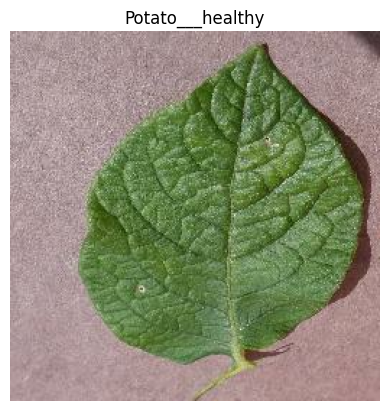

In [11]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80 ==> Training
10==>Validation
10==>Testing

In [12]:
train_size=0.8
len(dataset)*train_size


54.400000000000006

In [13]:
train_=dataset.take(54)
test_ds=dataset.skip(54)

In [14]:
dataset.skip(54) 

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [16]:
val_ds=test_ds.take(6)
len(test_ds)

14

In [17]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):
    
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds, test_ds

In [19]:
train_ds,val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #for improving the performance
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [26]:

resize_and_rescale=tf.keras.Sequential(
    [layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
    )

NameError: name 'IMAGE_SIZE' is not defined